## W poniższym okienku proszę wpisać swoje **imię, nazwisko i numer grupy**.

*   Imię: Wojciech
*   Nazwisko: Siemiątkowski
*   Grupa: 12c


# **Metoda Monte Carlo**

Twórcą metody [Monte Carlo](https://en.wikipedia.org/wiki/Monte_Carlo_method) jest [Stanisław Ulam](https://pl.wikipedia.org/wiki/Stanis%C5%82aw_Ulam), polski matematyk, biorący udział w projekcie Manhattan.

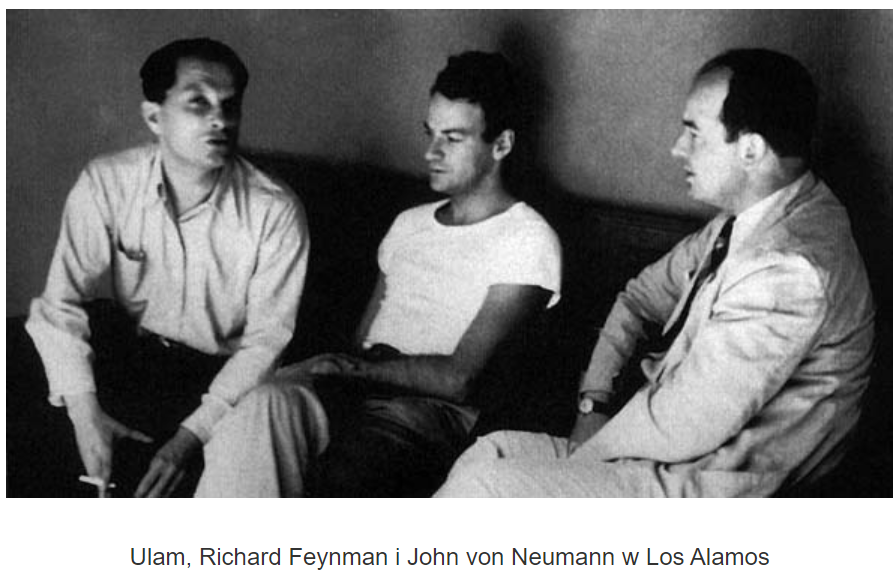

O co chodzi w symulacjach Monte Carlo? Zobacz film:

https://youtu.be/7ESK5SaP-bc


**Po zajęciach**, polecam też zobaczyć:

> trailer filmu o Ulamie: https://youtu.be/-eXVe-gpm7I

> krótki filmik o roli Ulama w budownie bomby wodorowej: https://youtu.be/0JA4anZwn7E

# **Zadanie 1 - wyliczanie liczby $\pi$**

Zaimplementuj poniższy algorytm wyliczający wartość stałej $\pi$.

Idea: w kwadrat o boku długości 2, którego środkiem jest środek układu współrzędnych wpisz koło o promieniu r = 1. Pole kwadratu to $2^2 = 4$, natomiast pole okręgu to $\pi r^2 = \pi$, więc stosunek tych pól wynosi $\pi/4$.

1. Wybierz w sposób losowy $N$ punktów wewnątrz kwadratu.

2. Jeśli punkt jest wewnątrz koła - dopisz go to listy

3. Policz stosunek liczby punktów wewnątrz koła do wszystkich wylosowanych punktów, $N$.

*Wskazówka: to losowania liczb z przedziału (a,b) wykorzystaj metodę `numpy.random.uniform(a,b)`*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("bmh")
%config InlineBackend.figure_formats=["png"]

In [12]:
N = 131313
w_kole = []

for n in range(N):
  x = np.random.uniform(-1, 1)
  y = np.random.uniform(-1, 1)

  if np.sqrt(x**2 + y**2) <= 1:
    w_kole.append((x, y))
  
ratio = 4 * (len(w_kole)/N)

print(f"Stosunek punktów wewnątrz koła do N: {ratio}")


Stosunek punktów wewnątrz koła do N: 3.140496371265602


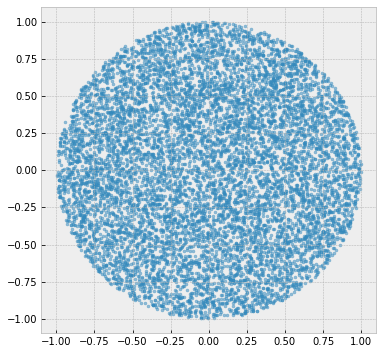

In [6]:
plt.figure(figsize=(6, 6))
plt.scatter([x[0] for x in w_kole], [x[1] for x in w_kole], marker=".", alpha=0.5);

# **Zadanie 2 - sprawdź błąd przybliżenia**

Sprawdź czy błąd przybliżenia $|\pi_{MC} - \pi|$ maleje z liczbą kroków metody Monte Carlo jak $\frac{1}{\sqrt{N}}$

*Wskazówka: Popraw kod z zadania 1 tak, aby wpisywał do listy `przyblizenie` stosunek punktów w kole do aktualnie wykonanych kroków pętli.*

In [15]:
N = 131313
w_kole = []
proximation = []

for n in range(1, N + 1):
  x = np.random.uniform(-1, 1)
  y = np.random.uniform(-1, 1)

  if np.sqrt(x**2 + y**2) <= 1:
    proximation.append((len(proximation)/n)*4)

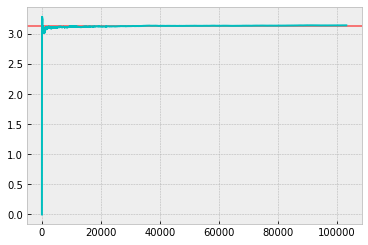

In [18]:
# rysowanie aktualnej wartości przyblizenia w funkcji liczby kroków MC


# wartość \pi:
plt.axhline(np.pi, color="r", alpha=0.5);
plt.plot(proximation, color="c")

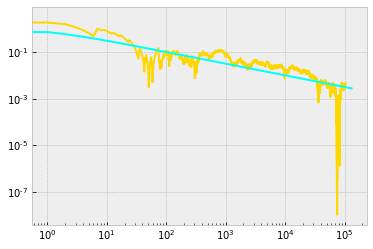

In [24]:
# Rysowanie błędu przybliżenia:
error = np.abs(np.array(proximation)-np.pi)
plt.plot(error, color="gold")

arr = np.arange(1, N+1)
arr = np.sqrt(arr)**(-1)
plt.loglog(arr, color="cyan")

# **Zadanie 3 - rzut monetą**

Policz metodą Monte Carlo prawdopodobieństwo, że przy 10 rzutach monetą dostaniemy więcej niż 3 reszki.


*Wskazówka: Milion razy: i) wylosuj 10 liczby z przedziału $[0,1]$, ii) sprawdź ile z nich jest większa niż 0.5.*

In [31]:
N = 10000
rzuty = 0

for n in range(N):
  count = 0
  for i in range(0, 10):
    x = np.random.uniform(0, 1)
    if x < 0.5:
      count += 1
  if count > 3:
    rzuty += 1

proxi = rzuty/N 
print(proxi)

0.8293


# **Zadanie 4 - Całki**

Policz metodą Monte Carlo wartość całki oznaczonej $\int_1^5 x^2 dx$.

*Wskazówka: policz średnią wartość funkcji $x^2$ na przedziale $[1,5]$ i pomnoż ją przez długość przedziału.*

In [37]:
N = 10000
suma = 0

for n in range(N):
  x = np.random.uniform(1, 5)
  s = x**2
  suma += s

avg = suma/n
f = avg * 4
print(f"Monte Carlo: {f}")
print(f"Sprawdzenie: {124/3}")

Monte Carlo: 41.37074498354462
Sprawdzenie: 41.333333333333336


# **Zadanie domowe**

Policz metodą Monte Carlo wartość całki $\int_0^1 \int_4^6 \cos x^4 + 3y^2 dx dy$

*Wskazówka: powinno wyjść około 2*

In [47]:
N = 10000
result = 0

def f(x, y):
  return np.cos(x**4) + (3 * y**2)

for n in range(N):
  x = np.random.uniform(4, 6)
  y = np.random.uniform(0, 1)
  result += f(x, y) * (6-4) * (1-0)

print(result/N)

2.0158564318804206
